## **Project: Potato Leaf Disease Detection**  

### **Overview**  
Potato plants can get sick, which affects their growth. This project uses **AI and deep learning** to find diseases in potato leaves quickly and accurately.  

### **Problem Statement**  
Farmers may not notice leaf diseases early, leading to crop damage. This project helps by:  
 - Identifying healthy and diseased leaves automatically  
 - Using deep learning for fast and accurate detection  
 - Making disease monitoring easier and more affordable  

### **Dataset**  
The dataset has **three types of leaf images**:  
- **Healthy Leaves**   
- **Diseased Leaves** (like Late Blight, Early Blight)  
- **Other Anomalies**   

The dataset is **split into three parts**:  
- **Training Set** (Used for model learning)  
- **Validation Set** (Used for hyperparameter tuning)  
- **Test Set** (Used for model evaluation)   

### **Steps to Build the Project**  
-  Import necessary libraries 
-  Load and check the dataset  
-  Process and enhance the images 
-  Build a **CNN model** for classification  
-  Train the model with images  
-  Test and evaluate the model  
-  Predict diseases on new leaves
-  Deploy the model using **Streamlit** 

This project helps farmers detect diseases early and protect their crops!

### **Step 1. Import Necessary Libraries**

In [1]:
# import necessary libraries
import tensorflow as tf 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

### **Step 2: Load and Preprocess the Data**

In [2]:
# This code retrieves the current working directory and constructs the full paths  
# for the training, testing, and validation datasets.
import os
print("Current Dir", os.getcwd())
curr_dir = os.getcwd()
train_path = os.path.join(curr_dir, "dataset", "Train")
test_path = os.path.join(curr_dir, "dataset", "Test")
valid_path = os.path.join(curr_dir, "dataset", "Valid")

Current Dir e:\EMPOWER AI TRANSFORMATIVE LEARNING - A CSR INITIATIVE OF MICROSOFT & SAP Internship\Potato Leaf Disease Detection


#### **Load training images**
Keras image datasets load: https://keras.io/api/data_loading/image/

In [4]:
# Load training images
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    # batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    # seed=None,
    # validation_split=None,
    # subset=None,
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False
)

Found 900 files belonging to 3 classes.


In [5]:
# Get the class labels
labels = training_set.class_names
print(labels)


['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


#### **Load validation images**

In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    # batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    # seed=None,
    # validation_split=None,
    # subset=None,
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False
)

Found 300 files belonging to 3 classes.


In [7]:
# Get the validation class labels
val_labels = validation_set.class_names
print(val_labels)


['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


### **Step 3: Build the CNN Model**
CNN Model: https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks


In [8]:
# Build the model
cnn = tf.keras.models.Sequential()

# First set of layers
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[128, 128, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Second set of layers
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu"))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Third set of layers
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu"))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Fourth set of layers
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding="same", activation="relu"))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu"))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Fifth set of layers
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding="same", activation="relu"))
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation="relu"))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Dropout layer
cnn.add(tf.keras.layers.Dropout(0.25))

# Flatten the layers before feeding into Dense layer
cnn.add(tf.keras.layers.Flatten())

# Fully connected layers
cnn.add(tf.keras.layers.Dense(units=1500, activation="relu"))

# Dropout to reduce overfitting
cnn.add(tf.keras.layers.Dropout(0.4))

# Output layer with softmax activation function for multi-class classification
cnn.add(tf.keras.layers.Dense(units=3, activation="softmax"))

C:\Users\angad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### **Step 4: Compile and Train the Model**

In [ ]:
# Compile the model
cnn.compile(optimizer=tf.keras.optimizers.Adam(
        learning_rate=0.0001),
        loss='categorical_crossentropy', 
        metrics=['accuracy'])

In [12]:
# model summary statistics
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Training the CNN model for 10 epochs using the training and validation datasets.  
# epochs=10 means the model will go through the entire dataset 10 times to learn patterns.  

training_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 35s 948ms/step - accuracy: 0.3380 - loss: 1.4873 - val_accuracy: 0.3900 - val_loss: 1.0469
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 25s 848ms/step - accuracy: 0.4657 - loss: 1.0229 - val_accuracy: 0.6667 - val_loss: 0.7656
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 25s 844ms/step - accuracy: 0.6563 - loss: 0.7249 - val_accuracy: 0.7567 - val_loss: 0.5132
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 25s 847ms/step - accuracy: 0.7409 - loss: 0.5570 - val_accuracy: 0.8500 - val_loss: 0.4321
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 25s 845ms/step - accuracy: 0.8200 - loss: 0.4234 - val_accuracy: 0.7800 - val_loss: 0.4167
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 840ms/step - accuracy: 0.8574 - loss: 0.3113 - val_accuracy: 0.9200 - val_loss: 0.2082
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 880ms/step - accuracy: 0.8750 - loss: 0.3528 - val_accuracy: 0.8967 - val_loss: 0.2343
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 832ms/step - accuracy: 0.8998 - loss: 0.2443 - val_accu

### **Step 5: Evaluate Model Performance**

In [14]:
# Training accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 205ms/step - accuracy: 0.9781 - loss: 0.0607
Training accuracy: 0.9800000190734863


In [15]:
# Validation accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 218ms/step - accuracy: 0.9441 - loss: 0.1411
Validation accuracy: 0.9566666483879089


### **Step 6: Save Model**

In [16]:
# Save the trained model
cnn.save('trained_potato_leaf_disease_model.keras')

In [17]:
# Return dictionary of history
training_history.history

{'accuracy': [0.36666667461395264,
  0.5166666507720947,
  0.6788889169692993,
  0.7477777600288391,
  0.8366666436195374,
  0.8933333158493042,
  0.8866666555404663,
  0.9266666769981384,
  0.9144444465637207,
  0.9722222089767456],
 'loss': [1.2646293640136719,
  0.9621229767799377,
  0.6831217408180237,
  0.5567216277122498,
  0.3894396424293518,
  0.2549913227558136,
  0.31734028458595276,
  0.18954384326934814,
  0.2238016426563263,
  0.0917280986905098],
 'val_accuracy': [0.38999998569488525,
  0.6666666865348816,
  0.7566666603088379,
  0.8500000238418579,
  0.7799999713897705,
  0.9200000166893005,
  0.8966666460037231,
  0.9200000166893005,
  0.9333333373069763,
  0.9566666483879089],
 'val_loss': [1.0469104051589966,
  0.7656072974205017,
  0.513177752494812,
  0.43208277225494385,
  0.4167287051677704,
  0.20816662907600403,
  0.23425059020519257,
  0.20421931147575378,
  0.15639005601406097,
  0.1091294214129448]}

In [18]:
# Save training history
import json
with open('training_hist.json', 'w') as f:
    json.dump(training_history.history, f)

### **Step 7: Plot Accuracy Graph**

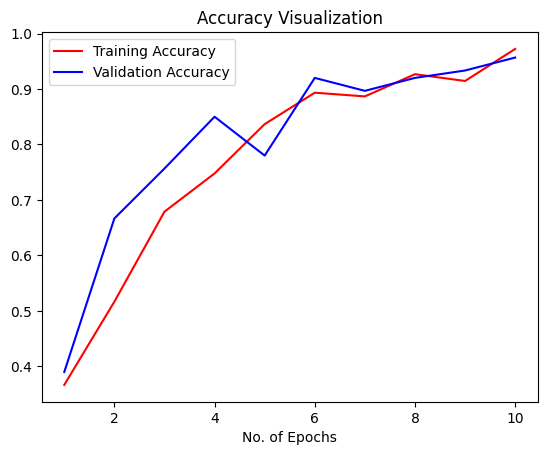

In [19]:
# Plot the accuracy graph
epochs = [i for i in range(1, 11)]
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Accuracy Visualization')
plt.legend()
plt.show()

### **Step 8: Model Evaluation - Precision, Recall, F1-Score**

In [21]:
# Load the testing data
testing_set = tf.keras.utils.image_dataset_from_directory(
    test_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    # batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    # seed=None,
    # validation_split=None,
    # subset=None,
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False
)


Found 300 files belonging to 3 classes.


In [22]:
# Get the testing class labels
test_labels = testing_set.class_names
print(test_labels)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


#### **Predict on test data**

In [23]:
# Predicting class probabilities for the test dataset using the trained CNN model  
y_pred = cnn.predict(testing_set)

# Converting predicted probabilities into class labels  
predicted_categories = tf.argmax(y_pred, axis=1)    

10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 321ms/step


In [24]:
predicted_categories

<tf.Tensor: shape=(300,), dtype=int64, numpy=
array([1, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 1, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 1, 1, 2, 1, 0, 2, 1, 1, 0,
       0, 1, 2, 0, 0, 1, 0, 0, 1, 2, 1, 0, 2, 1, 1, 2, 1, 0, 2, 0, 1, 2,
       1, 0, 0, 0, 2, 2, 0, 2, 0, 0, 1, 2, 2, 0, 2, 0, 2, 1, 0, 0, 0, 1,
       1, 1, 0, 2, 0, 2, 2, 0, 1, 1, 0, 2, 2, 1, 2, 2, 2, 1, 1, 1, 0, 2,
       0, 2, 1, 1, 1, 1, 2, 2, 0, 1, 2, 0, 1, 0, 0, 1, 0, 2, 0, 2, 0, 1,
       0, 0, 2, 0, 2, 2, 0, 0, 1, 2, 2, 1, 0, 0, 1, 2, 0, 2, 0, 1, 2, 2,
       0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2, 0,
       1, 1, 0, 0, 0, 1, 0, 2, 0, 1, 2, 2, 1, 0, 0, 1, 0, 2, 2, 1, 1, 1,
       0, 2, 0, 0, 0, 1, 2, 1, 1, 2, 1, 0, 2, 2, 2, 2, 2, 0, 1, 2, 0, 0,
       1, 0, 1, 0, 2, 2, 2, 2, 0, 1, 2, 2, 0, 1, 0, 2, 2, 1, 0, 1, 0, 1,
       2, 2, 2, 0, 1, 2, 0, 2, 0, 2, 1, 0, 1, 1, 0, 1, 1, 1, 0, 2, 2, 1,
       0, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 1, 2, 1,
     

In [ ]:
# Extracting true labels from the test dataset  
true_categories = tf.concat([y for x, y in testing_set], axis=0)  

# Converting true labels into class indices  
Y_true = tf.argmax(true_categories, axis=1)

In [25]:
Y_true

<tf.Tensor: shape=(300,), dtype=int64, numpy=
array([2, 0, 1, 1, 1, 2, 0, 1, 2, 1, 0, 2, 2, 2, 0, 0, 2, 1, 0, 0, 2, 2,
       2, 0, 1, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 1, 0, 2, 1, 0, 1, 2,
       0, 0, 1, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 2, 0, 2, 2, 2, 2, 1, 1, 1,
       1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 0, 2, 1, 1, 2, 2, 0, 0, 1, 0, 0, 1,
       2, 1, 1, 1, 2, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1, 0, 2, 2, 2, 0, 2, 1,
       0, 1, 0, 0, 2, 0, 2, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 2, 2,
       1, 2, 0, 0, 2, 2, 0, 1, 0, 1, 0, 2, 1, 1, 2, 0, 0, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 1, 1, 2, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1, 1, 0, 1, 0, 2,
       2, 1, 0, 0, 2, 2, 2, 2, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 0, 2, 0, 2,
       1, 2, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 2, 1, 1, 1, 0, 0, 2, 1, 1, 2,
       1, 2, 1, 1, 0, 2, 2, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 2, 2, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 2, 0, 1, 0, 1, 1, 2, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 2, 1,
     

In [26]:
# Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_true, predicted_categories)

In [43]:
# print Precision, Recall, F1-Score
print(classification_report(Y_true, predicted_categories, target_names=test_labels))

                       precision    recall  f1-score   support

Potato___Early_blight       0.31      0.31      0.31       100
 Potato___Late_blight       0.28      0.25      0.26       100
     Potato___healthy       0.30      0.34      0.32       100

             accuracy                           0.30       300
            macro avg       0.30      0.30      0.30       300
         weighted avg       0.30      0.30      0.30       300



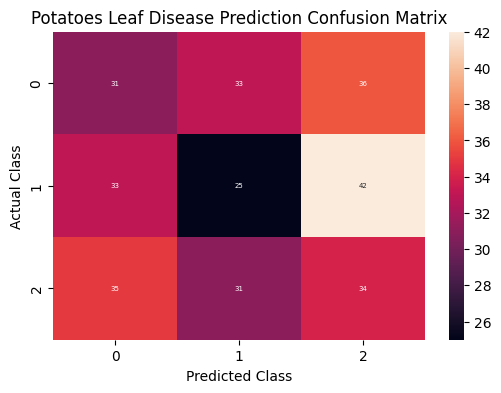

In [44]:
# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, annot_kws={"size": 5})
plt.xlabel('Predicted Class', fontsize=10)
plt.ylabel('Actual Class', fontsize=10)
plt.title('Potatoes Leaf Disease Prediction Confusion Matrix', fontsize=12)
plt.show()

### **Conclusion**  

The Potato Leaf Disease Detection model was successfully trained using a CNN, achieving accurate classification of healthy and diseased leaves. It was evaluated on a validation set and tested on unseen images, proving its effectiveness. This model can aid farmers in early disease detection, improving crop health and yield.